# Notebook to balance corpus

In [38]:
import setup_corpus

In [43]:
import random
import pandas as pd
import nltk
from nltk.corpus import treebank
nltk.download('treebank')
categories = ('extended_description', 'extended_installation', 'extended_invocation', 'extended_citation')


def build_corpora():
    corpora = {}
    for cat in categories:
        corpora[cat] = build_corpus(cat)
    return corpora

def build_corpus(selected_category):
    categories_df = {cat : pd.read_csv(f"./training_corpus/{cat}.csv") for cat in categories}
    negative_sample_size = int(len(categories_df[selected_category]) / 4)
    print(f"Selected Category: {selected_category}")
    for category in categories_df:
        categories_df[category].drop('URL', 1, inplace=True)
        if category != selected_category:
            categories_df[category] = categories_df[category].sample(negative_sample_size)
        categories_df[category] = categories_df[category].assign(**{selected_category: category == selected_category})
        print("{} has {} samples;".format(category, len(categories_df[category])))
        #print(categories_df[category].head())
    treebank_background = pd.DataFrame(map(lambda sent: ' '.join(sent), random.sample(list(treebank.sents()), negative_sample_size)), columns=["excerpt"]).assign(description=False)
    #print("Treebank has {} samples.".format(len(treebank_background)))
    #print("categories_df")
    corpus = pd.concat(categories_df.values(), ignore_index=True, sort=False)
    corpus.append(treebank_background, ignore_index=True, sort=False)
    corpus.fillna(value='', inplace=True)
    return corpus
    


[nltk_data] Downloading package treebank to
[nltk_data]     /Users/pratheek/nltk_data...
[nltk_data]   Unzipping corpora/treebank.zip.


In [46]:
corpus =build_corpora()

Selected Category: extended_description
extended_description has 414 samples;
extended_installation has 103 samples;
extended_invocation has 103 samples;
extended_citation has 103 samples;
Selected Category: extended_installation
extended_description has 274 samples;
extended_installation has 1097 samples;
extended_invocation has 274 samples;
extended_citation has 274 samples;
Selected Category: extended_invocation
extended_description has 381 samples;
extended_installation has 381 samples;
extended_invocation has 1524 samples;
extended_citation has 381 samples;
Selected Category: extended_citation
extended_description has 108 samples;
extended_installation has 108 samples;
extended_invocation has 108 samples;
extended_citation has 433 samples;


In [77]:
corpus['extended_installation']

,contributor,excerpt,extended_installation
0,Allen Mao,Sandbox,False
1,Rosna Thomas,Nextflow is a bioinformatics workflow manager ...,False
2,Allen Mao,Lithology and stratigraphic logs for wells and...,False
3,Allen Mao,If you give it all of OpenStreetMap and zoom o...,False
4,Pratheek,Text classifiers,False
...,...,...,...
1914,Allen Mao,If you use Detectron in your research or wish ...,False
1915,Ling Li,year = {2016},False
1916,Allen Mao,title = {Iterative Visual Reasoning Beyond Con...,False
1917,Allen Mao,"[Kamb1956]Kamb, 1959. Ice Petrofabric Observat...",False


In [84]:
corpus['extended_citation'].drop(columns=['Unnamed: 0'],inplace=True)

In [85]:
corpus['extended_citation']

,contributor,excerpt,extended_citation
0,Allen Mao,This baseline is run on dbnet-2018 challenge d...,False
1,Allen Mao,"Many useful operators, however, do not lend th...",False
2,Rosna Thomas,* compile analysis-friendly corpora;,False
3,Allen Mao,Below we show some example scene graphs along ...,False
4,Sharad,It aims to be a fully-tested package taking ad...,False
...,...,...,...
752,Yi Xie,,True
753,Yi Xie,"Deqing Li, Honghui Mei, Yi Shen, Shuang Su, We...",True
754,Yi Xie,MIT License.,True
755,Yi Xie,"Copyright (c) 2014 Ryzac, Inc.",True


In [87]:
corpus['extended_description'].drop(columns=['Unnamed: 0'],inplace=True)

In [89]:
corpus['extended_description']

,contributor,excerpt,extended_description
0,Allen Mao,Puppeteer is a Node library which provides a h...,True
1,Allen Mao,The major contributors of this repository incl...,True
2,Allen Mao,Integral Regression is initially described in ...,True
3,Allen Mao,We build a 3D pose estimation system based mai...,True
4,Allen Mao,The Integral Regression is also known as soft-...,True
...,...,...,...
718,Allen Mao,"author = {Wu, Huikai and Zheng, Shuai and Z...",False
719,Allen Mao,title = {Spatial Memory for Context Reasoning ...,False
720,Rosna Thomas,year={2016},False
721,Allen Mao,"booktitle={arXiv},",False


In [90]:
corpus['extended_invocation'].drop(columns=['Unnamed: 0'],inplace=True)

In [91]:
corpus['extended_invocation']

,contributor,excerpt,extended_invocation
0,Sharad,lakeFS supports AWS S3 or Google Cloud Storage...,False
1,Allen Mao,Extract data directly from binary ANSYS v14.5+...,False
2,Allen Mao,"Sleek, intuitive, and powerful front-end frame...",False
3,Rosna Thomas,Dense Human Pose Estimation In The Wild,False
4,Allen Mao,Puppeteer is a Node library which provides a h...,False
...,...,...,...
2662,Allen Mao,Cite pyGeoPressure as:,False
2663,Allen Mao,"Werthmüller, D., 2017, An open-source full 3D ...",False
2664,Allen Mao,"{ethanlee, jlwu1992, zlin, hongliu}@pku.edu.cn...",False
2665,Allen Mao,title={Quantized densely connected U-Nets for ...,False


# Distribution of Data

# For Invocation

In [94]:
corpus['extended_invocation']['extended_invocation'].value_counts()

True     1524
False    1143
Name: extended_invocation, dtype: int64

# For Installation

In [95]:
corpus['extended_installation']['extended_installation'].value_counts()

True     1097
False     822
Name: extended_installation, dtype: int64

# For Citation

In [96]:
corpus['extended_citation']['extended_citation'].value_counts()

True     433
False    324
Name: extended_citation, dtype: int64

# For Description

In [97]:
corpus['extended_description']['extended_description'].value_counts()

True     414
False    309
Name: extended_description, dtype: int64

# Bar Plots

# Extended Installation

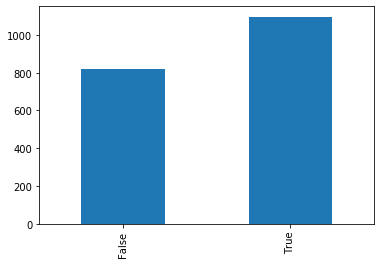

In [109]:
corpus['extended_installation']['extended_installation'].value_counts().sort_values().plot(kind = 'bar')

# Extended Invocation

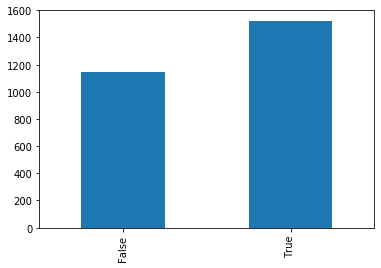

In [112]:
corpus['extended_invocation']['extended_invocation'].value_counts().sort_values().plot(kind = 'bar')

# Extended Description

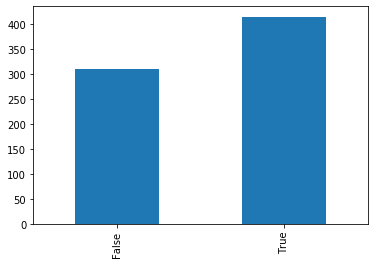

In [113]:
corpus['extended_description']['extended_description'].value_counts().sort_values().plot(kind = 'bar')

# Exteneded Citation

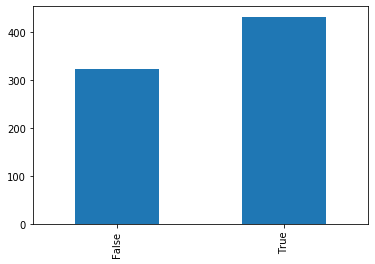

In [114]:
corpus['extended_citation']['extended_citation'].value_counts().sort_values().plot(kind = 'bar')